# Analisis de Datos

[x] Normalizar valores
- Comprobar dimensionalidad -> imagenes 28x28 en escala de grises
- Valores atipicos
- Anadir representacion de los datos en forma de un cluster inicial

In [1]:
!pip install scikit-learn-extra


zsh:1: /Users/circus/repos/3year2sem/maai/maai_env/bin/pip: bad interpreter: /Users/circus/repos/3year2sem/maai_env/bin/python3.13: no such file or directory


In [4]:
from utils.mnist_reader import load_mnist
import sklearn
import matplotlib.pyplot as plt
import sklearn.metrics
import sklearn.cluster
import sklearn_extra.cluster

ModuleNotFoundError: No module named 'sklearn_extra'

In [10]:
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')
X_train = X_train
X_test = X_test

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

print('X_train:', X_train[0])
print('y_train:', y_train[0])

X_train: (60000, 784)
y_train: (60000,)
X_test: (10000, 784)
y_test: (10000,)
X_train: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0
   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0
  36 136 127  62  54   0   0   0   1   3   4   0   0   3   0   0   0   0
   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0
   0   0   0  12  10   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15   0   0
   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163
 127 121 122 146 141  88 172  66   0 

# Determinacion de Agrupamientos

- Silhouette
- V measure
- Rand index

In [ ]:
k = 20
silhoutte_values = []
for i in range(2, k):
    kmeans = sklearn.cluster.KMeans(n_clusters=i)
    kmeans.fit(X_train)
    y_pred = kmeans.predict(X_train)
    silhoutte = sklearn.metrics.silhouette_score(X_train, y_pred)
    silhoutte_values.append(silhoutte)


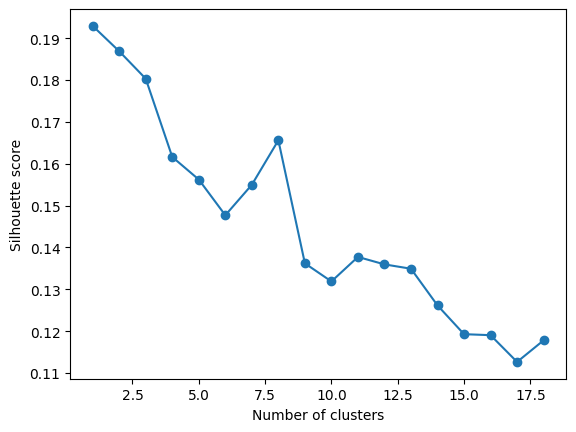

In [28]:
plt.plot(range(1, k-1), silhoutte_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# Metodos de agrupamiento
- k-means
- dbscan
- jerarquico
- k++
- k-medoids
- spectral

In [5]:
def plot_clusters(predictions, X): 
    plt.scatter(X[:, 0], X[:, 1], c=predictions)
    plt.show()

In [11]:
# TODO: Find the best number of clusters using the silhouette score
best_k = 10
kmeans = sklearn.cluster.KMeans(n_clusters=best_k)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_train)

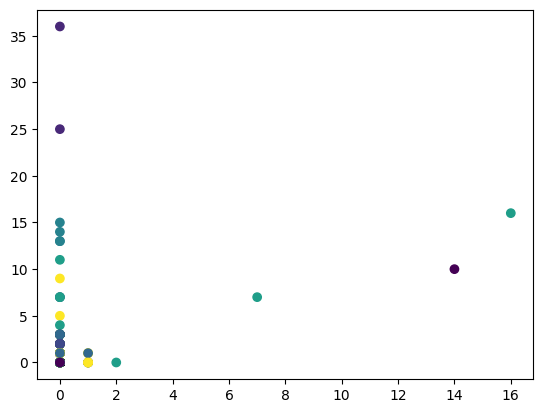

In [12]:
plot_clusters(y_pred, X_train)

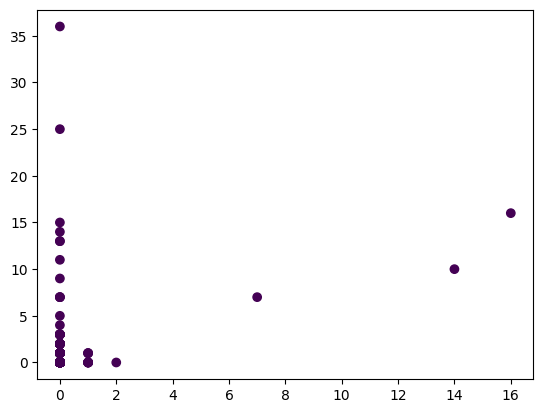

In [13]:
dbscan = sklearn.cluster.DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_train)
y_pred = dbscan.fit_predict(X_train)

plot_clusters(y_pred, X_train)

In [ ]:
jerarquic = sklearn.cluster.AgglomerativeClustering(n_clusters=10)
y_pred = jerarquic.fit_predict(X_train)

plot_clusters(y_pred, X_train)

In [ ]:
medoids = sklearn_extra.cluster.KMedoids(n_clusters=10)
y_pred = medoids.fit_predict(X_train)

plot_clusters(y_pred, X_train)

# EVALUACION DE CALIDAD

In [ ]:
# TODO: Utilizar metodos como matriz de confusion, f1-score, precision, recall, etc